In [6]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Image

In [7]:
data = np.genfromtxt('data.csv', delimiter=',')

In [8]:
x = []
y = []

for i in range(0, len(data)):
    x.append(data[i][0])
    y.append(data[i][1])

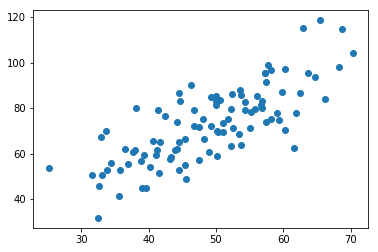

In [9]:
plt.scatter(x, y)

In [10]:
initial_m = 0
initial_b = 0

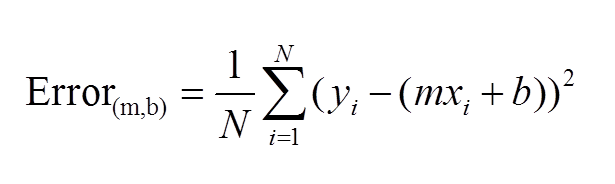

In [11]:
Image(filename='linear_regression_error.png')

In [58]:
def compute_error(m, b, x, y):
    totalError = 0
    
    for i in range(0, len(x)):
        totalError += ((y[i] - (m * x[i] + b)) **2)
    
    totalError = totalError / float(len(x))
    return totalError

In [59]:
print('initial mean squared error: ', compute_error(initial_m, initial_b, x, y))

initial mean squared error:  5565.10783448


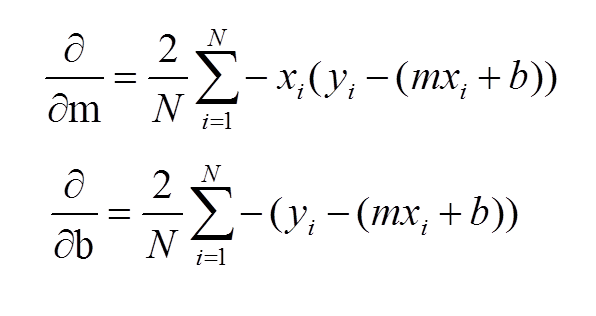

In [65]:
Image(filename='linear_regression_gradient.png')

In [66]:
def linear_formula(x, m, b):
    return (m * x) + b

def gradient_step(x, y, current_m, current_b, learning_rate):
    gradient_m = 0
    gradient_b = 0
    N = float(len(x))
    
    for i in range(0, len(x)):
        gradient_m += (-2/N) * x[i] * (y[i] - linear_formula(x[i], current_m, current_b))
        gradient_b += (-2/N) * (y[i] - linear_formula(x[i], current_m, current_b))
    
    new_m = current_m - (learning_rate * gradient_m)
    new_b = current_b - (learning_rate * gradient_b)
    
    return [new_m, new_b]

In [69]:
def gradient_descent(x, y, current_m, current_b, learning_rate, epochs):
    m = current_m
    b = current_b
    
    for i in range(epochs):
        m, b = gradient_step(x, y, m, b, learning_rate)
        print("epoch[", i, "] - loss: ", compute_error(m, b, x, y))
        
    return [m, b]

In [82]:
learning_rate = 0.0001
epochs = 1000

In [83]:
m, b = gradient_descent(x, y, initial_m, initial_b, learning_rate, epochs)
print("m: ", m, "b: ", b)

epoch[ 0 ] - loss:  1484.58655741
epoch[ 1 ] - loss:  457.854257574
epoch[ 2 ] - loss:  199.509985726
epoch[ 3 ] - loss:  134.505910582
epoch[ 4 ] - loss:  118.149693422
epoch[ 5 ] - loss:  114.03414906
epoch[ 6 ] - loss:  112.998577317
epoch[ 7 ] - loss:  112.737981876
epoch[ 8 ] - loss:  112.672384359
epoch[ 9 ] - loss:  112.655851815
epoch[ 10 ] - loss:  112.651664898
epoch[ 11 ] - loss:  112.650584362
epoch[ 12 ] - loss:  112.650285447
epoch[ 13 ] - loss:  112.650183203
epoch[ 14 ] - loss:  112.650130445
epoch[ 15 ] - loss:  112.650090139
epoch[ 16 ] - loss:  112.650052967
epoch[ 17 ] - loss:  112.650016584
epoch[ 18 ] - loss:  112.649980399
epoch[ 19 ] - loss:  112.649944265
epoch[ 20 ] - loss:  112.649908144
epoch[ 21 ] - loss:  112.649872027
epoch[ 22 ] - loss:  112.649835911
epoch[ 23 ] - loss:  112.649799796
epoch[ 24 ] - loss:  112.649763681
epoch[ 25 ] - loss:  112.649727567
epoch[ 26 ] - loss:  112.649691454
epoch[ 27 ] - loss:  112.649655341
epoch[ 28 ] - loss:  112.649619

In [85]:
pred_y = []

for i in range(0, len(x)):
    pred_y.append(linear_formula(x[i], m, b))

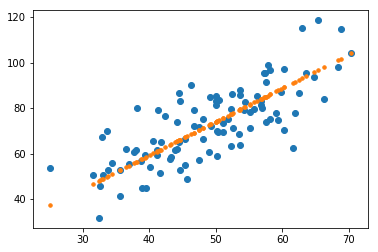

In [95]:
plt.scatter(x, y)
plt.scatter(x, pred_y, s=12)